<a href="https://colab.research.google.com/github/MRizkyPratamaa/ANALITIKADATAREVISI/blob/main/TugasMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


About Dataset

Context

This dataset was created for a Google Analytics Capstone project for a fictional company Cyclistic. The data were obtained from a real bike-share program of the Chicago Department of Transportation (CDOT), Divvy.

Content

Inside this dataset are 19 csv files of uncleaned bikeshare data spanning from January 2020 to September 2021. It is important to note, that the data has some null values in station names, ids and coordinates. Additionaly there are major inconsistencies with station ids and station names. License granted by Motivate International Inc.

Acknowledgements

We wouldn't be here without the help of others. If you owe any attributions or thanks, include them here along with any citations of past research.

**1.1 Importing Library**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [74]:
!gdown --id 11VOTlP2V-WbzppfZe5_TuXGWethRpKRV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11VOTlP2V-WbzppfZe5_TuXGWethRpKRV
To: /content/Expanded_data_with_more_features.csv
100% 2.91M/2.91M [00:00<00:00, 50.6MB/s]


Import data merupakan proses memuat dan membaca data ke dalam notebook. Sebelumya saya telah menyimpan dataset yang akan saya pakai pada practice kali ini didalam gdrive, kemudian saya import data tersebut.

In [75]:
import pandas as pd
dataset = pd.read_csv('Expanded_data_with_more_features.csv')
dataset

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


Setelah mengimport data, kemudian ubah data menjadi dataframe agar dapat dengan mudah dalam mengolah data

## 2. Exploratory Data

In [77]:
dataset.shape

(30641, 15)

Kemudian selanjutnya exploratory data. masukan syntax dataset.shape untuk megecek jumlah baris dan kolom dari dataset yang telah diimport. Pada dataset Train-Set.csv terdiri dari 30641 baris dan 15 kolom

In [78]:
dataset.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

Coding diatas digunakan untuk mengetahui nama-nama kolom yang ada pada dataset

In [79]:
dataset.dtypes

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

Coding diatas digunakan untuk mengetahui tipe data dari setiap kolom di dataset. Tipe data dari dataset ini terdiri dari tipe data int64, object, dan float64.

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


Setelah masukan syntax `dataset.info` Pada dataset ini untuk mengetahui semua hal mengenai dataset tersebut, seperti kolom, baris, index, dan type datanya

In [81]:
dataset.nunique()

Unnamed: 0             1000
Gender                    2
EthnicGroup               5
ParentEduc                6
LunchType                 2
TestPrep                  2
ParentMaritalStatus       4
PracticeSport             3
IsFirstChild              2
NrSiblings                8
TransportMeans            2
WklyStudyHours            3
MathScore                95
ReadingScore             90
WritingScore             93
dtype: int64

Coding diatas digunakan untuk menampilkan jumlah unique tiap kolom pada dataset. Data unique terkecil pada gender, lunchtype, testprep, isfirstchild, dan transportmean. Sedangkan untuk yang terbesar pada Mathscore.

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [82]:
dataset.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Coding diatas digunakan untuk mengetahui kolom yang terdapat missing value. Pada data ini terdapat 9 missing value.

In [85]:
dataset['EthnicGroup'].dtypes

dtype('O')

Tipe data EthnicGroup merupakan tipe data objek

In [86]:
dataset['ParentEduc'].dtypes

dtype('O')

Tipe data ParentEduc merupakan tipe data objek

In [87]:
dataset['TestPrep'].dtypes

dtype('O')

Tipe data TestPrep merupakan tipe data objek

In [88]:
dataset['ParentMaritalStatus'].dtypes

dtype('O')

Tipe data ParentMaritalStatus merupakan tipe data objek

In [89]:
dataset['PracticeSport'].dtypes

dtype('O')

Tipe data PracticeSports merupakan tipe data objek

In [90]:
dataset['IsFirstChild'].dtypes

dtype('O')

Tipe data IsFirstChild merupakan tipe data objek

In [91]:
dataset['NrSiblings'].dtypes

dtype('float64')

Tipe data NrSiblings merupakan tipe data float64

In [92]:
dataset['TransportMeans'].dtypes

dtype('O')

Tipe data TransportMeans merupakan tipe data objek

In [93]:
dataset['WklyStudyHours'].dtypes

dtype('O')

Tipe data WklyStudyHours merupakan tipe data objek

In [94]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

Peniru univariat untuk menyelesaikan nilai yang hilang dengan strategi sederhana.

Ganti nilai yang hilang menggunakan statistik deskriptif (mis. rata-rata, median, atau paling sering) di sepanjang setiap kolom, atau gunakan nilai konstanta.

In [95]:
imputer = imputer.fit(dataset[['NrSiblings']])
imputer

SimpleImputer()

In [96]:
dataset[['NrSiblings']] = imputer.transform(dataset[['NrSiblings']])
dataset.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings                0
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Coding diatas digunakan untuk mengganti nilai missing value dengan statistika deskriptif.

In [97]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Unnamed: 0      0
Gender          0
LunchType       0
NrSiblings      0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

Coding diatas digunakan untuk menghilangkan dataset dengan tipe object

Using drop column tohandle missing value on categorical or object data

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [98]:
dataset.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.420342,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


Coding diatas digunakan untuk menampilkan detail statistik seperti count,mean,std,min,dan lain sebagainya

<Axes: >

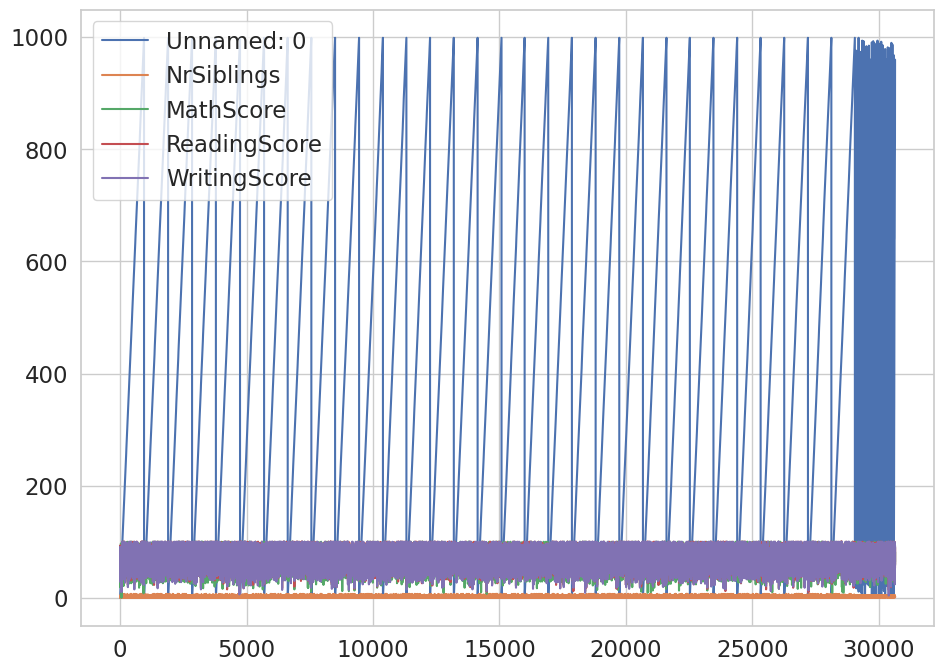

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

Coding diatas digunakan untuk menampilkan visualisasi data. Pada diagram diatas dapat dilihat bahwa data fluktuatif

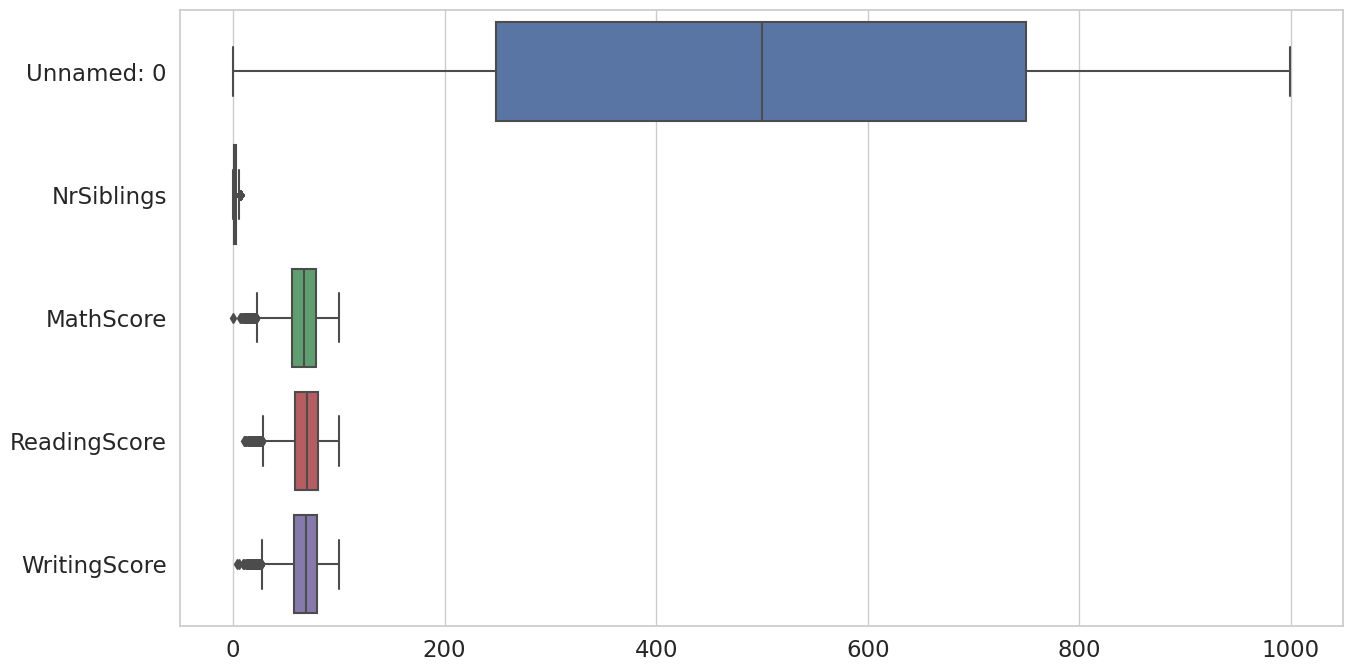

In [100]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(15,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Coding diatas digunakan untuk menampilkan visualisasi data. Pada diagram boxplot diatas dapat dilihat bahwa data berdekatan atau mendekati nilai rata-rata

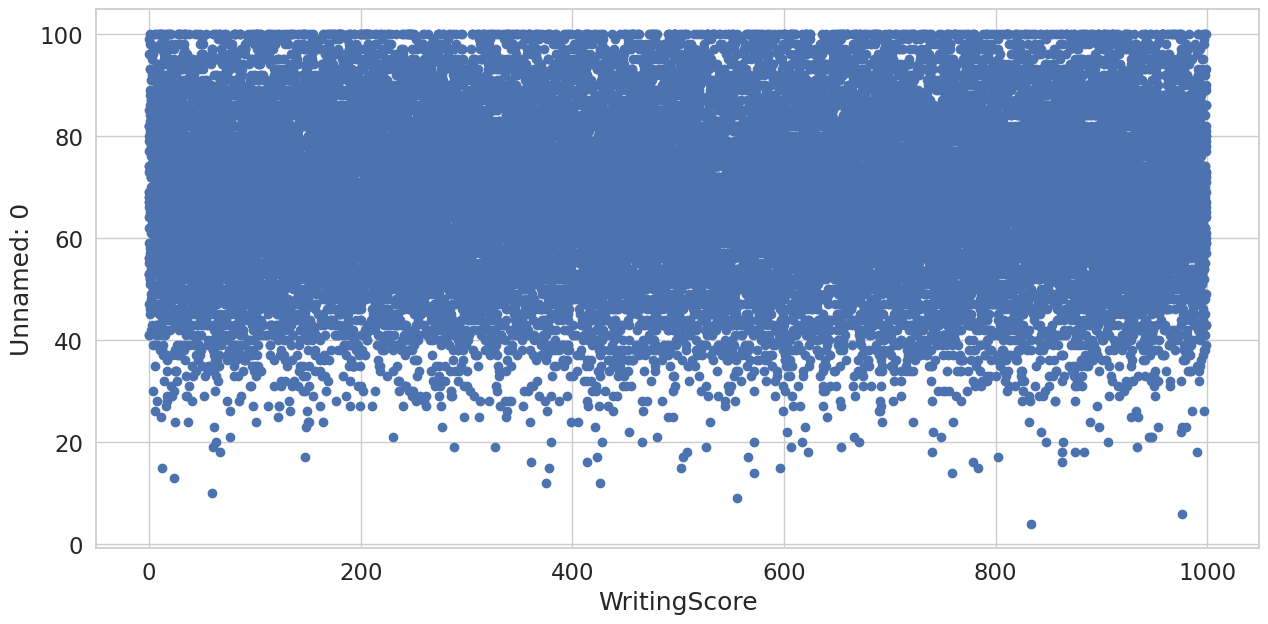

In [104]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Unnamed: 0'], dataset['WritingScore'])
 
# x-axis label
ax.set_xlabel('WritingScore')
 
# y-axis label
ax.set_ylabel('Unnamed: 0')
plt.show()

Coding diatas digunakan untuk menampilkan visualisasi data. Pada diagram scatter plot diatas dapat dilihat bahwa data berdekatan atau mendekati nilai rata-rata

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [51]:
#import sklearn

# IQR Price
#Q1 = np.percentile(dataset['seconds'], 25,
 #                  method = 'midpoint')
 
#Q3 = np.percentile(dataset['seconds'], 75,
 #                  method = 'midpoint')
#IQR = Q3 - Q1
 
#print("Old Shape: ", dataset.shape)

Old Shape:  (567545, 11)


In [52]:
# Upper bound
#upper = Q3 + 1.5 * IQR

# Lower bound
#lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
#outliers_upper = dataset[dataset['seconds'] > upper].index
#outliers_lower = dataset[dataset['seconds'] < lower].index

# Concatenate the indices of the outliers
#outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
#dataset.drop(outliers, inplace=True)

#print("New Shape: ", dataset.shape)


New Shape:  (567545, 11)


In [53]:
#import sklearn

# IQR Landsize
#Q1 = np.percentile(dataset['label'], 25,
 #                  method = 'midpoint')
 
#Q3 = np.percentile(dataset['label'], 75,
 #                  method = 'midpoint')
#IQR = Q3 - Q1
 
#print("Old Shape: ", dataset.shape)

Old Shape:  (567545, 11)


In [54]:
# Upper bound
#upper = Q3 + 1.5 * IQR

# Lower bound
#lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
#outliers_upper = dataset[dataset['label'] > upper].index
#outliers_lower = dataset[dataset['label'] < lower].index

# Concatenate the indices of the outliers
#outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
#dataset.drop(outliers, inplace=True)

#print("New Shape: ", dataset.shape)


New Shape:  (567545, 11)


Coding diatas digunakan untuk menghilangkan outliers. Karena pada kasus ini tidak ada outliers maka coding tersebut tidak digunakan

Show data distribution based on density (kde - kernel density estimation)

Show data distribution based on histogram

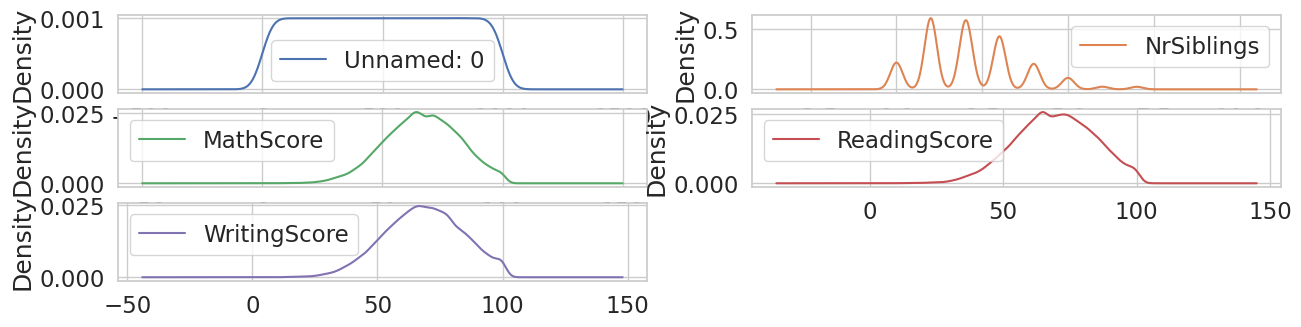

In [106]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Coding diatas digunakan untuk mengetahui kerapatan atau sebaran data yang dapat dilihat pada nilai-nilai yang ditampilkan dalam diagram.

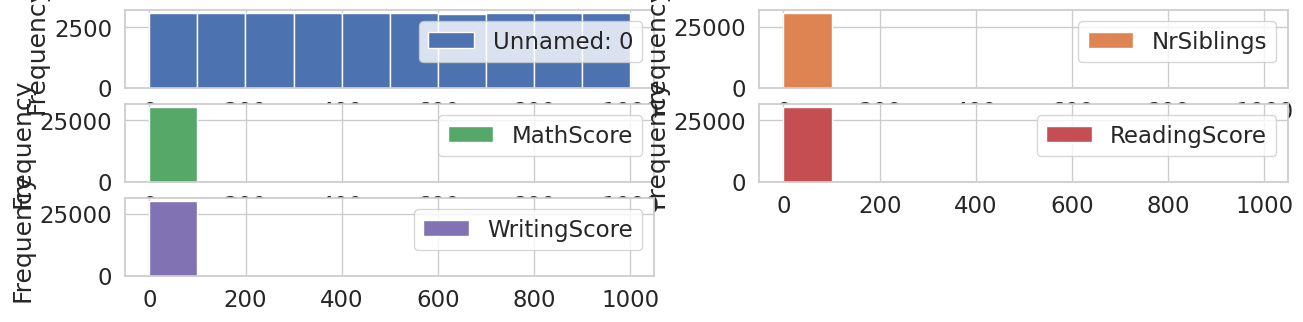

In [107]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Coding diatas digunakan untuk mengetahui frequency data yang dapat dilihat pada nilai-nilai yang ditampilkan pada diagram.

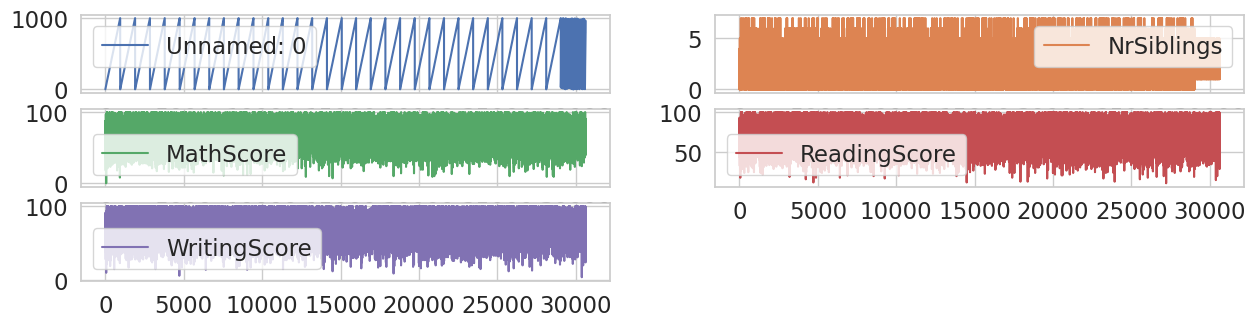

In [108]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Coding diatas digunakan untuk menampilkan sebaran signalic data

**3.2 CORRELATION MATRIX**

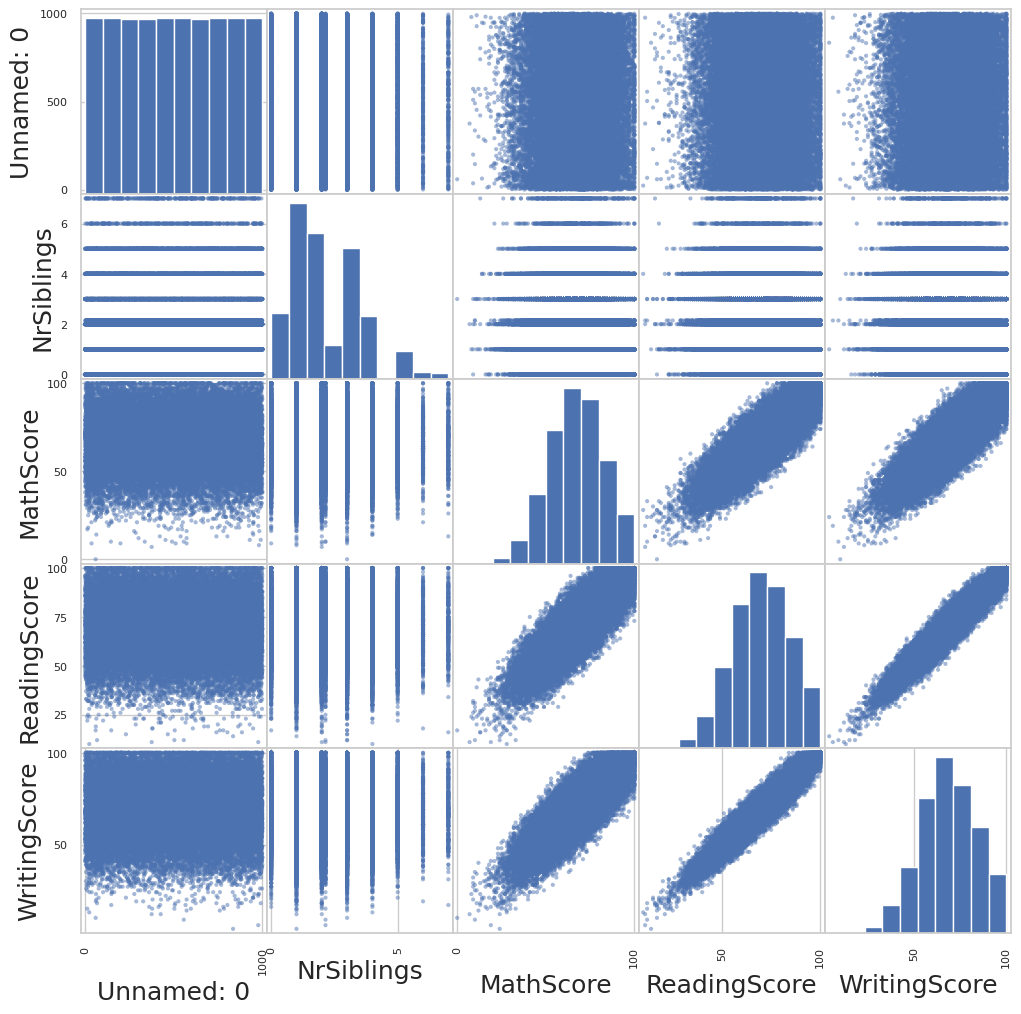

In [109]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

Coding diatas digunakan untuk menampilkan scatter plot dari setiap matrix untuk mengetahui korelasinya. Korelasi paling kuat digambarkan dengan diagram batang, dan korelasi paling lemah digambarkan dengan scatter plot yang tidak beraturan

correlation matrix with heatmap

<ipython-input-110-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


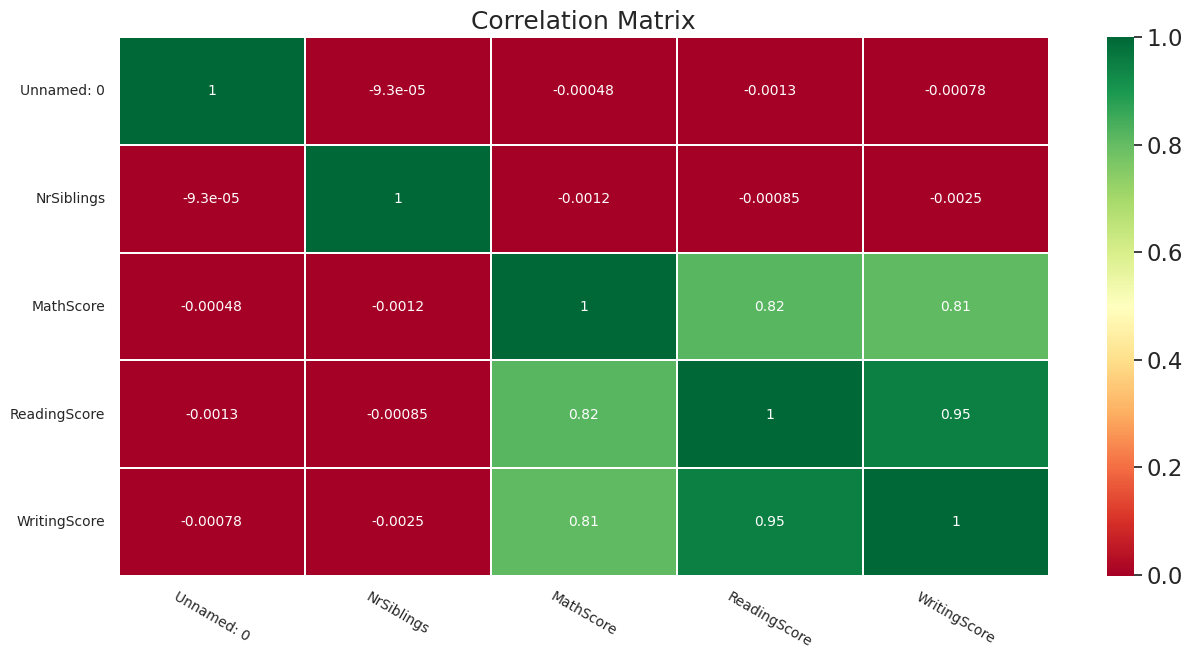

In [110]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Coding diatas digunakan untuk mengetahui tingkat korelasi matrix. Apabila nilai korelasi mencapai atau mendekati angka 1, maka korelasi matrix akan semakin kuat, begitupun sebaliknya 

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [111]:
x = dataset.drop('Gender', axis=1)
x

,Unnamed: 0,LunchType,NrSiblings,MathScore,ReadingScore,WritingScore
0,0,standard,3.0,71,71,74
1,1,standard,0.0,69,90,88
2,2,standard,4.0,87,93,91
3,3,free/reduced,1.0,45,56,42
4,4,standard,0.0,76,78,75
...,...,...,...,...,...,...
30636,816,standard,2.0,59,61,65
30637,890,standard,1.0,58,53,51
30638,911,free/reduced,1.0,61,70,67
30639,934,standard,3.0,82,90,93


Coding diatas digunakan untuk memilih kolom yang akan dijadikan data input

Choose feature Type as a label

In [113]:
y = dataset["Gender"]
y

0        female
1        female
2        female
3          male
4          male
          ...  
30636    female
30637      male
30638    female
30639    female
30640      male
Name: Gender, Length: 30641, dtype: object

Coding diatas digunakan untuk memilih kolom yang akan dijadikan label

In [114]:
y.values.reshape(-1,1)

array([['female'],
       ['female'],
       ['female'],
       ...,
       ['female'],
       ['female'],
       ['male']], dtype=object)

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [115]:
x = pd.get_dummies(x)
x

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,LunchType_free/reduced,LunchType_standard
0,0,3.0,71,71,74,0,1
1,1,0.0,69,90,88,0,1
2,2,4.0,87,93,91,0,1
3,3,1.0,45,56,42,1,0
4,4,0.0,76,78,75,0,1
...,...,...,...,...,...,...,...
30636,816,2.0,59,61,65,0,1
30637,890,1.0,58,53,51,0,1
30638,911,1.0,61,70,67,1,0
30639,934,3.0,82,90,93,0,1


In [116]:
x.shape

(30641, 7)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [117]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6
0,-1.730107,0.601348,0.289141,0.109933,0.361412,-0.734413,0.734413
1,-1.726644,-1.510854,0.158944,1.397308,1.267955,-0.734413,0.734413
2,-1.723180,1.305415,1.330715,1.600578,1.462215,-0.734413,0.734413
3,-1.719717,-0.806787,-1.403417,-0.906416,-1.710688,1.361632,-1.361632
4,-1.716254,-1.510854,0.614633,0.584229,0.426165,-0.734413,0.734413
...,...,...,...,...,...,...,...
30636,1.095934,-0.102719,-0.492040,-0.567633,-0.221366,-0.734413,0.734413
30637,1.352217,-0.806787,-0.557138,-1.109686,-1.127910,-0.734413,0.734413
30638,1.424946,-0.806787,-0.361843,0.042176,-0.091860,1.361632,-1.361632
30639,1.504601,0.601348,1.005223,1.397308,1.591721,-0.734413,0.734413


Coding diatas digunakan untuk mengeneralisasi data berdasarkan standar deviasinya

**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [118]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6
0,0.000000,0.428571,0.71,0.677778,0.729167,0.0,1.0
1,0.001001,0.000000,0.69,0.888889,0.875000,0.0,1.0
2,0.002002,0.571429,0.87,0.922222,0.906250,0.0,1.0
3,0.003003,0.142857,0.45,0.511111,0.395833,1.0,0.0
4,0.004004,0.000000,0.76,0.755556,0.739583,0.0,1.0
...,...,...,...,...,...,...,...
30636,0.816817,0.285714,0.59,0.566667,0.635417,0.0,1.0
30637,0.890891,0.142857,0.58,0.477778,0.489583,0.0,1.0
30638,0.911912,0.142857,0.61,0.666667,0.656250,1.0,0.0
30639,0.934935,0.428571,0.82,0.888889,0.927083,0.0,1.0


Coding diatas digunakan untuk mengeneralisasi data berdasarkan rata-ratanya

**4.3 Splitting**

In [119]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

COding diatas digunakan untuk membagi data menjadi data train dan data test. Data train>data test.

In [120]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({'female': 12339, 'male': 12173})
Test distribution Counter({'female': 3085, 'male': 3044})


Coding diatas digunakan untuk menampilkan distribusi data dari setiap label

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [121]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [122]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.865209 (0.005163)


In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.8705463182897862


[[1696   11   49]
 [ 117   47   53]
 [  83   14  456]]


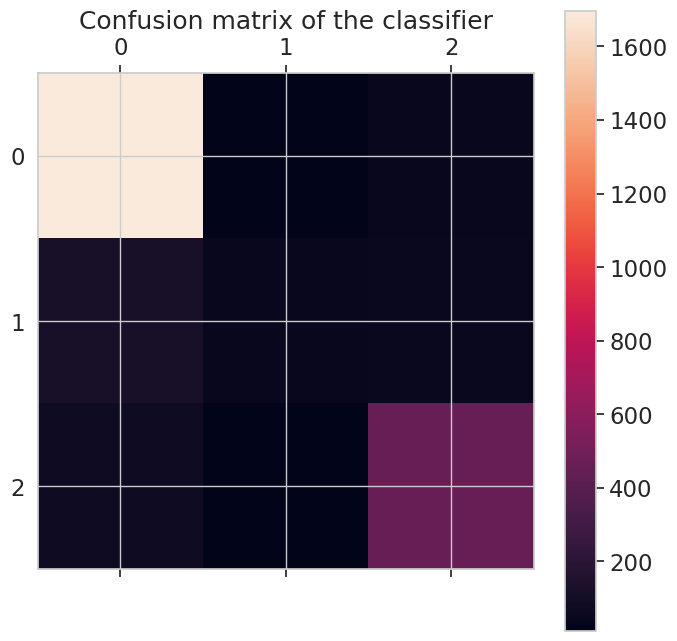

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           h       0.89      0.97      0.93      1756
           t       0.65      0.22      0.33       217
           u       0.82      0.82      0.82       553

    accuracy                           0.87      2526
   macro avg       0.79      0.67      0.69      2526
weighted avg       0.86      0.87      0.85      2526

